<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/ST_VII_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pyvital vitaldb vital
!pip install neurokit2
import vitaldb
import pandas as pd
import numpy as np

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical data
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # Load track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # Load lab result

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.8 M

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()


In [3]:
# inclusion / exclusion criteria
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'Solar8000/ST_II', 'caseid'])
)

print('Total {} cases found'.format(len(caseids)))

Total 5978 cases found


In [9]:
import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm



mean= []
median= []
variance = []
std = []
max = []
min = []
subject = []








for caseid in tqdm(caseids):
  srate = 100
  vals = vitaldb.load_case(caseid, ['Solar8000/ST_II'], 1 / srate)
  initial_signal = vals[:,0]

  subject.append(caseid)
  mean.append(np.nanmean(initial_signal))
  median.append(np.nanmedian(initial_signal))
  variance.append(np.nanvar(initial_signal))
  std.append(np.nanstd(initial_signal))
  max.append(np.nanmax(initial_signal))
  min.append(np.nanmin(initial_signal))




In [16]:
import pandas as pd

df_dict ={
"Case_ID":subject,
"Mean":mean,
"Median":median,
"variance":variance,
"Standard_deviation:":std,
"Max":max,
"Min":min
}

df = pd.DataFrame.from_dict(df_dict)

df.to_excel("ST_II_stat.xlsx", index=False)

<ipython-input-44-ec75a503cf31>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(initial_signal, hist=True, kde=True,


<Axes: ylabel='Density'>

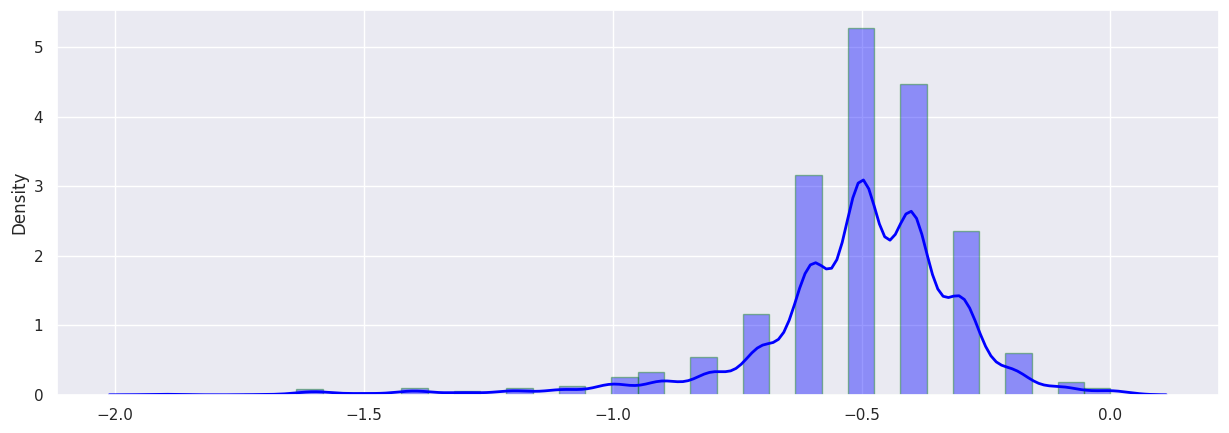

In [ ]:




import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.distplot(initial_signal, hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 2})